In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import scipy as sp

# Genetic algorithm

In [3]:
def parent_selection(pop, pop_cumscores, nParents):
    parents = []
    for i in range(nParents):
        r = np.random.uniform(0, pop_cumscores[-1])
        for j, s in enumerate(pop_cumscores):
            if s >= r:
                parents.append(pop[j])
                break
        # end for j
    # end for i
    return parents


[2, 4]


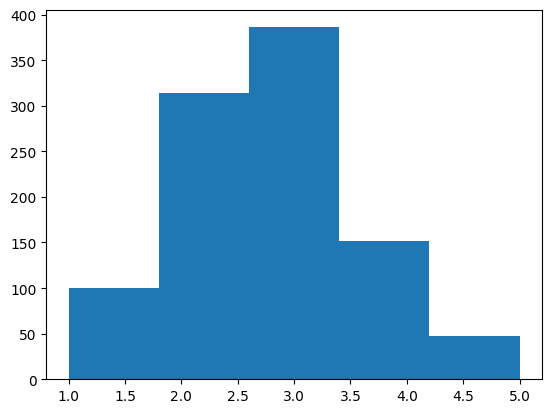

In [32]:
psets = []
for i in range(500):
    parents = parent_selection([1, 2, 3, 4, 5], [10, 40, 80, 95, 100], 2)
    psets.extend(parents)


plt.hist(psets, bins=5);
# print(psets)
print(parents)

In [33]:
def probability(p):
    "Return true with probability p."
    return p > np.random.uniform(0.0, 1.0)

In [34]:
import random

def recombination(parents, mut_rate, nucleotides=(0,1,2,3,4,5,6,7)):

    # Crossover
    nParents = len(parents)    
    nChromosome = len(parents[0])
    child = list(parents[0])
    for i in range(1, nParents):
        cp = random.randrange(nChromosome)
        child = child[:cp] + list(parents[i][cp:])
    
    # Mutation
    if probability(mut_rate):
        child = child
        mut_pos = random.randrange(nChromosome)
        mut = np.random.choice(nucleotides)
        child[mut_pos] = mut
        child = child
    
    return tuple(child)

In [35]:
for i in range(10):
    child = recombination([(-1, -2, -3, -4),(10, 20, 30, 40), (100, 200, 300, 400)], 0.0)
    print(child)

(100, 200, 300, 400)
(-1, -2, 30, 400)
(100, 200, 300, 400)
(100, 200, 300, 400)
(10, 20, 30, 400)
(-1, 20, 300, 400)
(-1, 200, 300, 400)
(10, 200, 300, 400)
(-1, 20, 30, 400)
(-1, 200, 300, 400)


In [36]:
for i in range(10):
    child = recombination([(-1, -2, -3, -4),(10, 20, 30, 40), (100, 200, 300, 400)], 0.0)
    print(child)

(-1, 200, 300, 400)
(100, 200, 300, 400)
(-1, -2, 30, 400)
(-1, 20, 30, 400)
(-1, 200, 300, 400)
(-1, -2, 300, 400)
(10, 20, 30, 400)
(-1, 200, 300, 400)
(10, 20, 30, 400)
(-1, -2, 30, 400)


In [37]:
def genetic_algorithm(population, fitness, ngen=1000, 
                      pmut=0.3, nParents = 2, disp=False, fit_goal=28):
    
    for i in range(ngen):
        # Prepare population cumulative scores for selection by probabilities
        cumulative_scores = []
        cumscore = 0
        fits = []  # for disp/debugging
        for chromosome in population:
            fit = fitness(chromosome)
            cumscore += fit
            cumulative_scores.append(cumscore)
            fits.append(fit)
            
            # Goal test
            if fit >= fit_goal:
                return chromosome
            
        if disp:
            print('* population=', population)            
            print('* fitness=', fits)
            print('* cumulative_scores=', cumulative_scores)
            
            
            
        # Progress to a new population
        next_population = []        
        for i in range(len(population)):
            # Selection
            parents = parent_selection(population, cumulative_scores, nParents)
        
            # Recombination
            child = recombination(parents, pmut)
            
            if disp:
                print('* parents=', parents)            
                print('* child=', child)

            
            # Make up the next generation
            next_population.append(child)
        
        population = next_population
    return argmax(population, fn=fitness)  # Return the best found

# Evolution

* Natural selection

Inspired by [Natural Selection and the Rock Pocket Mouse — HHMI BioInteractive Video](https://www.youtube.com/watch?v=sjeSEngKGrg)

* Rock-pocket mice in Valley of Fire, New Mexico, USA.

* Black patches of land occured 1000 years ago.

In [6]:
# Mutation rate
mu = 4/10e8 # 4 offsprings in 10^8 offsprings

# Reproductive rate 
R = 5       # 5 offsprings a year

# Selection coefficient ~ reproduction + survival
S = 0.01    # 1 % advantage of a black mouse


# Time
N = 1000

population = np.array([4950, 50])
print(f'Black population {population[1]/np.sum(population)*100} %')

# Natural selection
selection = np.array([1, 1+S])/(1 + 1 + S)

print(f'Selection: {selection[0]} vs {selection[1]}')


Black population 1.0 %
Selection: 0.49751243781094534 vs 0.5024875621890548


Binomial distribution

Probability of $k$ successes out of $n$ trials with $p$ chance of success in each trial and $q = 1 - p$,

\begin{eqnarray}
pmf = \left(
      \begin{array}
       . 
       n
       \\ 
       k
       \end{array}
       \right)
       p^k q^{n - k}
\end{eqnarray}

$$Mean = n p $$

In [14]:
# Year

# Average survivors
survived = np.round(np.multiply(population, selection),0)
print(f'{survived=}')

# Reproduction
population = R*survived

print(f'Population ({population[0]:0.0f},{population[1]:0.0f})')
print(f'Black population {population[1]/np.sum(population)*100} %')


survived=array([37913.,   397.])
Population (189565,1985)
Black population 1.0362829548420778 %


## Simulation

In [35]:
# Mutation rate
mu = 4/10e8 # 4 offsprings in 10^8 offsprings

# Reproductive rate 
R = 5       # 5 offsprings a year

# Selection coefficient ~ reproduction + survival
S = 0.01    # 1 % advantage of a black mouse

# Die out
D = 0.594

# Time
N = 1000

population = np.array([4950, 50])
print(f'Black population {population[1]/np.sum(population)*100} %')

# Natural selection
selection = np.array([1, 1+S])/(1 + 1 + S)

print(f'Selection: {selection[0]} vs {selection[1]}')

pops = []


for n in range(N):

    
    # Average survivors
    survived = np.round(np.multiply(population, selection),0)

    # Reproduction
    population = R*survived
    
    # Die out
    population = (1 - D)*population

    if n % 200 == 0:
        print('Year', 1+n)
        print(f'  {survived=}')

        # print(f'  Population ({population[0]:0.0f},{population[1]:0.0f})')
        print(f'  Black population {population[1]/np.sum(population)*100} %')

    pops.append(population)

Black population 1.0 %
Selection: 0.49751243781094534 vs 0.5024875621890548
Year 1
  survived=array([2463.,   25.])
  Black population 1.004823151125402 %
Year 201
  survived=array([17852.,  1506.])
  Black population 7.7797293108792225 %
Year 401
  survived=array([129310.,  79856.])
  Black population 38.178289014466976 %
Year 601
  survived=array([ 936783., 4232311.])
  Black population 81.87723032314753 %
Year 801
  survived=array([6.78632900e+06, 2.24310015e+08])
  Black population 97.06342000806383 %


# With mutation and population limit

Black population 0.0 %
Selection: 0.48780487804878053 vs 0.5121951219512195
Year 1052
  survived=array([16501.,     0.])
  offsprings=array([41251,     1])
  Black population 0.001731511782937683 %
Year 7835
  survived=array([12072.,     0.])
  offsprings=array([30179,     1])
  Black population 0.002366751869733977 %
Year 11693
  survived=array([    0., 14534.])
  offsprings=array([    1, 36334])
  Black population 99.9980341661916 %
Year 14146
  survived=array([    0., 20788.])
  offsprings=array([    1, 51969])
  Black population 99.99862558069216 %
Year 14224
  survived=array([    0., 11272.])
  offsprings=array([    1, 28179])
  Black population 99.99746527425732 %
Year 19762
  survived=array([    0., 18382.])
  offsprings=array([    1, 45954])
  Black population 99.99844568444286 %
Year 21168
  survived=array([    0., 19094.])
  offsprings=array([    1, 47734])
  Black population 99.99850364362777 %
Year 24018
  survived=array([    0., 25388.])
  offsprings=array([    1, 63469])


Text(0.5, 1.0, 'With 5.0% advantage')

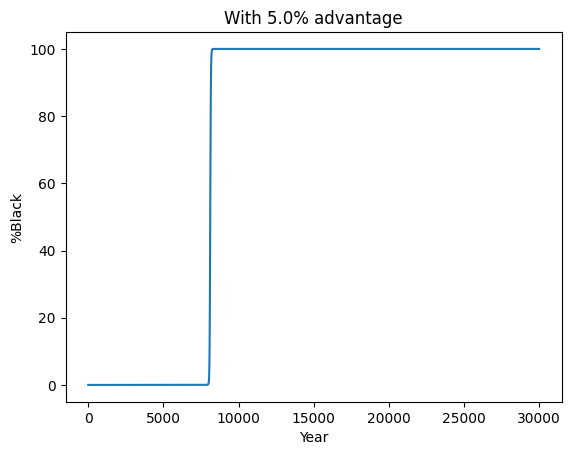

In [119]:
# Mutation rate
mu = 4/10e8 # 4 offsprings in 10^8 offsprings

# Reproductive rate 
R = 5       # 5 offsprings a year

# Selection coefficient ~ reproduction + survival
S = 0.05    # 1 % advantage of a black mouse

# Time
N = 30000

# population = np.array([4950, 50])
population = np.array([5000, 0])

print(f'Black population {population[1]/np.sum(population)*100} %')

# Natural selection
selection = np.array([1, 1+S])/(1 + 1 + S)

print(f'Selection: {selection[0]} vs {selection[1]}')

pops = []
black = []


for n in range(N):

    
    # Average survivors
    survived = np.round(np.multiply(population, selection),0)

    # Reproduction
    # 50% female
    offsprings = np.round(0.5*R*survived,0)
        
    # Mutation
    num_offsprings = int(np.sum(offsprings))
    chances = np.random.uniform(0, 1, num_offsprings)
    
    # [0, 0, 0, ... 0, 1, 1, ..., 1] ; 0 = sandy mouse, 1 = black mouse
    offspring = [0]*int(offsprings[0]) + [1]*int(offsprings[1])
    mutated_offsprings = (chances < mu)
    
    # XOR
    offspings =(offspring + mutated_offsprings) % 2
        
    offsprings = np.array([np.sum(offspings == 0), np.sum(offspings == 1)])
        
    population = offsprings + survived
    
    # Population limit by food
    if np.sum(population) > 50000:
        population = population/3

    pops.append(population)


    blk = population[1]/np.sum(population)*100
    black.append(blk)

    # if (n+1) % 1 == 200:
    if np.sum(mutated_offsprings) > 0:
        print('Year', 1+n)
        print(f'  {survived=}')
        print(f'  {offsprings=}')
        # print(f'  Population ({population[0]:0.0f},{population[1]:0.0f})')
        
        
        
        print(f'  Black population {blk} %')

    
plt.plot(black)
plt.ylabel('%Black')
plt.xlabel('Year')
plt.title(f'With {S*100}% advantage')

Text(0.5, 1.0, 'With 5.0% advantage')

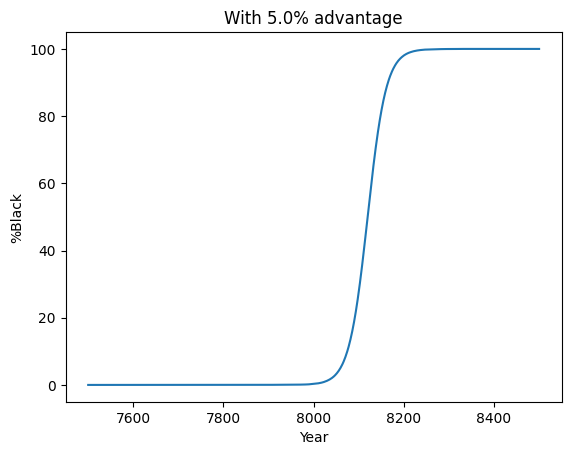

In [126]:


plt.plot(np.linspace(0,10000,10000)[7500:8500], black[7500:8500])
plt.ylabel('%Black')
plt.xlabel('Year')
plt.title(f'With {S*100}% advantage')

Black population 1.0 %
Selection: 0.49751243781094534 vs 0.5024875621890548


Text(0.5, 1.0, 'With 1.0% advantage')

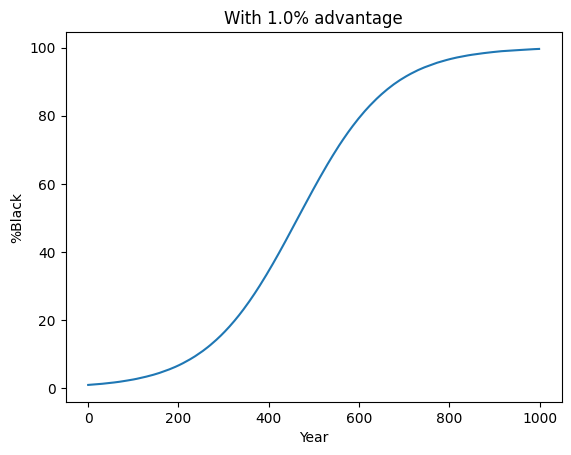

In [128]:
# Mutation rate
mu = 4/10e8 # 4 offsprings in 10^8 offsprings

# Reproductive rate 
R = 5       # 5 offsprings a year

# Selection coefficient ~ reproduction + survival
S = 0.01    # 1 % advantage of a black mouse

# Time
N = 1000

population = np.array([4950, 50])
# population = np.array([5000, 0])

print(f'Black population {population[1]/np.sum(population)*100} %')

# Natural selection
selection = np.array([1, 1+S])/(1 + 1 + S)

print(f'Selection: {selection[0]} vs {selection[1]}')

pops = []
black = []


for n in range(N):

    
    # Average survivors
    survived = np.round(np.multiply(population, selection),0)

    # Reproduction
    # 50% female
    offsprings = np.round(0.5*R*survived,0)
        
    # Mutation
    num_offsprings = int(np.sum(offsprings))
    chances = np.random.uniform(0, 1, num_offsprings)
    
    # [0, 0, 0, ... 0, 1, 1, ..., 1] ; 0 = sandy mouse, 1 = black mouse
    offspring = [0]*int(offsprings[0]) + [1]*int(offsprings[1])
    mutated_offsprings = (chances < mu)
    
    # XOR
    offspings =(offspring + mutated_offsprings) % 2
        
    offsprings = np.array([np.sum(offspings == 0), np.sum(offspings == 1)])
        
    population = offsprings + survived
    
    # Population limit by food
    if np.sum(population) > 50000:
        population = population/3

    pops.append(population)


    blk = population[1]/np.sum(population)*100
    black.append(blk)

    # if (n+1) % 1 == 200:
    if np.sum(mutated_offsprings) > 0:
        print('Year', 1+n)
        print(f'  {survived=}')
        print(f'  {offsprings=}')
        # print(f'  Population ({population[0]:0.0f},{population[1]:0.0f})')
        
        
        
        print(f'  Black population {blk} %')

    
plt.plot(black)
plt.ylabel('%Black')
plt.xlabel('Year')
plt.title(f'With {S*100}% advantage')